In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
#import CSV file
red_df = pd.read_csv('Resources/Data/winequality-red.csv', delimiter=';')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# drop duplicate data
red_df = red_df.drop_duplicates(keep = 'first', inplace = False)
red_df = red_df.dropna(axis = 'columns', how='all')
red_df = red_df.reset_index(drop = True)

In [4]:
red_stats = red_df.describe()
red_stats.drop(["count"], axis=0, inplace=True)
red_stats.T

,mean,std,min,25%,50%,75%,max
fixed acidity,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [5]:
#datatype 
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [6]:
# check for null values
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
red_df.shape

(1359, 12)

In [8]:
red_df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

# Select your features (columns)

In [9]:
# categorize wine quality
bins = [2,6,9]
group_names = ['Fair','Very Good']
red_df['quality']= pd.cut(red_df['quality'], bins, labels = group_names)

In [10]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Fair
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Fair
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Fair
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Fair
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Fair


In [11]:
X = red_df.drop("quality", axis =1)
y = red_df["quality"]

In [12]:
#X.head()

In [13]:
#y.head()

In [14]:
red_df['quality'].value_counts()

Fair         1175
Very Good     184
Name: quality, dtype: int64

[0.07123853 0.1020455  0.08897094 0.07515831 0.06931577 0.06928238
 0.081928   0.08830813 0.06859611 0.11258025 0.17257607]


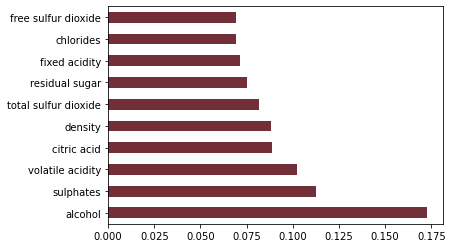

In [15]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X.columns )
feat_importances.nlargest(10).plot(kind= "barh" , color = "#722F37")
#plt.savefig('Resources/images/red_features_importance.jpg')
plt.show()


In [16]:
feat_importances.sort_values(ascending=False)

alcohol                 0.172576
sulphates               0.112580
volatile acidity        0.102045
citric acid             0.088971
density                 0.088308
total sulfur dioxide    0.081928
residual sugar          0.075158
fixed acidity           0.071239
chlorides               0.069316
free sulfur dioxide     0.069282
pH                      0.068596
dtype: float64

In [17]:
# Selected important features : top 5 features
selected_features = X[['alcohol', 'sulphates','volatile acidity','citric acid','density']]
                         

# Create a Train Test Split 
### test all features

In [ ]:
# Split the data using train_test_split
# create the train and validation datasets
# test with all features
from sklearn.model_selection import train_test_split

X_train, X_left, y_train, y_left = train_test_split(X, y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

In [ ]:
#Train the model using the training data
model.fit(X_train, y_train)

In [ ]:
#And score the model using the unseen testing data
model.score(X_train, y_train),model.score(X_val, y_val)

In [ ]:
# Overall Score for the model
model.score(X_test, y_test)

### test top 5 features

In [18]:
# y = selected features - top 5 features 
from sklearn.model_selection import train_test_split
X_train, X_left, y_train, y_left = train_test_split(selected_features, y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [19]:
X_train.shape, X_val.shape, X_test.shape

((951, 5), (285, 5), (123, 5))

In [20]:
#Train the model using the training data
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [21]:
#And score the model using the unseen testing data
model.score(X_train, y_train),model.score(X_val, y_val)

(1.0, 0.8385964912280702)

In [22]:
# Overall Score for the model
model.score(X_test, y_test)

0.8699186991869918

# Pre-pocessing 

In [23]:
# Scale your data
X_scale = StandardScaler().fit(X_train)

X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [24]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(951, 5) (123, 5) (951,)


# Train the Model

In [25]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train_scaled, y_train)

#predict the test set

y_pred = model_svm.predict(X_test)

In [26]:
print(f"Training Data Score: {model_svm.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_svm.score(X_test_scaled, y_test)}")

Training Data Score: 0.8948475289169295
Testing Data Score: 0.9024390243902439


In [27]:
# print prediction results without gridSearchCV

predictions = model_svm.predict(X_test_scaled) 

In [28]:
# Calculate classification report (all features)

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,
                           ))

              precision    recall  f1-score   support

        Fair       0.91      0.99      0.95       109
   Very Good       0.75      0.21      0.33        14

    accuracy                           0.90       123
   macro avg       0.83      0.60      0.64       123
weighted avg       0.89      0.90      0.88       123



In [ ]:
# Plot Confusion Matrix (all features)

label_aux = plt.subplot()
cm_svm_red = confusion_matrix(y_test, predictions)
cm_svm = pd.DataFrame(cm_svm_red,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_svm,annot=True,cmap=plt.cm.Reds,fmt='3')
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted')
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted')
label_aux.set_title('Non-Normalized (All features)')
#plt.savefig('Resources/images/svm_red_cm_non-nor_all.jpg');

In [29]:
# Calculate classification report (selected features)

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,
                           ))

              precision    recall  f1-score   support

        Fair       0.91      0.99      0.95       109
   Very Good       0.75      0.21      0.33        14

    accuracy                           0.90       123
   macro avg       0.83      0.60      0.64       123
weighted avg       0.89      0.90      0.88       123



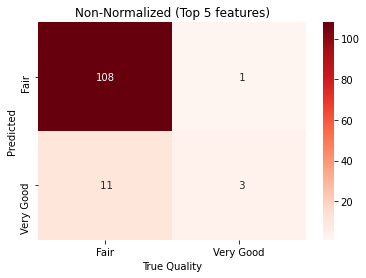

In [30]:
# Plot Confusion Matrix (selected features)

label_aux = plt.subplot()
cm_svm_red = confusion_matrix(y_test, predictions)
cm_svm = pd.DataFrame(cm_svm_red,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_svm,annot=True,cmap=plt.cm.Reds,fmt='3')
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted');
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted')
label_aux.set_title('Non-Normalized (Top 5 features)')
#plt.savefig('Resources/images/svm_red_cm_non-nor_selected.jpg');

# Hyperparameter Tuning (GridSearchCV)

In [31]:
from pprint import pprint
print('Parameters:\n')
pprint(model_svm.get_params())

Parameters:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [32]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [ 0.01,0.1,1,5,10],
              'gamma': [0.01,0.1,1,10],
              'kernel': ['linear', 'rbf', 'sigmoid']}

grid = GridSearchCV(model_svm, param_grid, verbose=3, return_train_score=True, scoring='accuracy' , cv=10)

In [33]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.874, test=0.865), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV]  C=0.01, gamma=0.01, kernel=linear, score=(train=0.873, test=0.874

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.01, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.874, test=0.865), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=0.01, gamma=0.01, kernel=sigmoid, sc

[CV]  C=0.01, gamma=1, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.874, test=0.865), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV]  C=0.01, gamma=1, kernel=sigmoid, score=(train=0.873, tes

[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, score=(train=0.874, test=0.86

[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=(train=0.808, test=0.875), total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=(train=0.840, test=0.842), total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=(train=0.819, test=0.779), total=   

[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV]  C=1, gamma=0.01, kernel=sigmoid, score=(train=0.874, test=0.865), total=   0

[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.922, test=0.895), total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.930, test=0.853), total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.926, test=0.874), total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.922, test=0.895), total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.925, test=0.916), total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.921, test=0.884), total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=(train=0.924, test=0.884), total=   0.0s
[CV] C=1, gamma=1, ke

[CV]  C=5, gamma=0.01, kernel=rbf, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV]  C=5, gamma=0.01, kernel=sigmoid, score=(train=0.870, test=0.865), total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV]  C=5, gamma=0.01, kernel=sigmoid, score=(train=0.871, test=0.874), total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV]  C=5, gamma=0.01, kernel=sigmoid, score=(train=0.869, test=0.874), total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV]  C=5, gamma=0.01, kernel=sigmoid, score=(train=0.869, test=0.874), total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV]  C=5, gamma=0.01, kernel=sigmoid, score=(train=0.869, test=0.874), total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV]  C=5, gamma=0.01, kernel=sigmoid, score=(train=0.869, tes

[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.798, test=0.811), total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.817, test=0.842), total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.811, test=0.789), total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.805, test=0.853), total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.817, test=0.779), total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV]  C=5, gamma=1, kernel=sigmoid, score=(train=0.810, test=0.842), total=   0.0s
[CV] C=5, gamma=10, kernel=linear ....................................
[CV]  C=5, gamma=10, kernel=linear, score=(train=0.874, test=0.865), total= 

[CV]  C=10, gamma=0.01, kernel=sigmoid, score=(train=0.869, test=0.874), total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.874, test=0.865), total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=(train=0.873, test

[CV]  C=10, gamma=10, kernel=linear, score=(train=0.874, test=0.865), total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV]  C=10, gamma=10, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV]  C=10, gamma=10, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV]  C=10, gamma=10, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV]  C=10, gamma=10, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV]  C=10, gamma=10, kernel=linear, score=(train=0.873, test=0.874), total=   0.0s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV]  C=10, gamma=10, kernel=linear, score=(train=0.873, test=0.874), 

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    8.2s finished


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10],
                         'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [34]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
0.8833333333333334


In [35]:
# Make predictions with the hypertuned model
grid_predictions = grid.predict(X_test_scaled)

## Classification report 
### All features

In [ ]:
# Calculate classification report - all features

from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions
                           ))

In [ ]:
# Plot Confusion Matrix - (Normalized)

label_aux = plt.subplot()
cm_svm_red = confusion_matrix(y_test, grid_predictions)
cm_svm = pd.DataFrame(cm_svm_red,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_svm,annot=True,cmap=plt.cm.Reds,fmt='3')
#label_aux.set_title('Normalized')
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted')
label_aux.set_title('Normalized (All features)')
#plt.savefig('Resources/images/svm_red_cm_nor_all.jpg');

### Selected Features

In [36]:
# Calculate classification report - top 5

from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions
                           ))

              precision    recall  f1-score   support

        Fair       0.91      0.99      0.95       109
   Very Good       0.75      0.21      0.33        14

    accuracy                           0.90       123
   macro avg       0.83      0.60      0.64       123
weighted avg       0.89      0.90      0.88       123



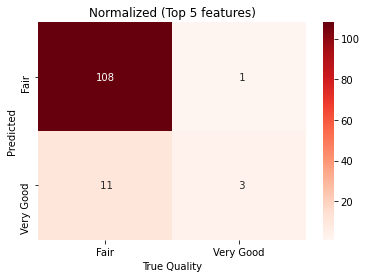

In [37]:
# Plot Confusion Matrix - (Normalized)

label_aux = plt.subplot()
cm_svm_red = confusion_matrix(y_test, grid_predictions)
cm_svm = pd.DataFrame(cm_svm_red,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_svm,annot=True,cmap=plt.cm.Reds,fmt='3')
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted')
label_aux.set_title('Normalized (Top 5 features)')
#plt.savefig('Resources/images/svm_red_cm_nor_selected.jpg');

In [38]:
# Save the Model (test all features, selected features)
import joblib
#filename = 'Resources/results/svm_red_all.sav'
filename = 'Resources/results/svm_red_selected.sav'
joblib.dump(model_svm, filename)

['Resources/results/red_wine_selected_svm.sav']